In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [10]:
dataDir='/home/josmar/proyectos/codes/annotation_tools/'
#dataType='val2017'
annFile='{}casia.json'.format(dataDir) #.format coloca dentro de {} las variables escritas después

In [11]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


In [12]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [13]:
# get all images containing given categories, select one at random
category = "person"
catIds = coco.getCatIds(catNms=[category]);
imgIds = coco.getImgIds(catIds=catIds );
print("Hay {} imagenes de la categoría {}".format(len(imgIds), category))
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# img =coco.loadImgs(imgIds[0])[0]

Hay 301 imagenes de la categoría person


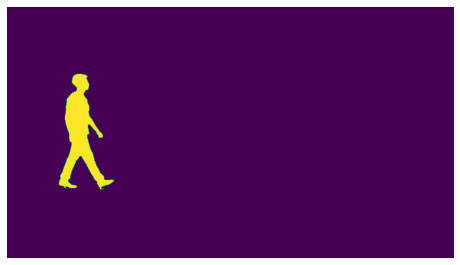

In [14]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
img_path = "/home/josmar/proyectos/codes/annotation_tools/background_substraction/bin_close_images/input/{}.png".format(img['file_name'].split('.') [0])
# img_path = "/home/josmar/proyectos/codes/datasets/casia_B1_silhouettes/{}.png".format(img['file_name'].split('.') [0])
I = io.imread(img_path)
plt.axis('off')
plt.imshow(I)
plt.show()

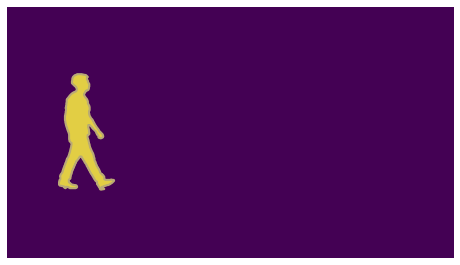

In [15]:
# load and display instance annotations 
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

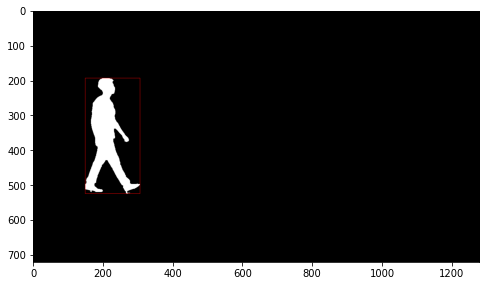

In [16]:
import cv2
for i in anns:
    [x,y,w,h] = i['bbox']
    start_point = (int(x), int(y)) 
    
    # Ending coordinate, here (220, 220) 
    # represents the bottom right corner of rectangle 
    end_point = (int(x+w), int(y+h)) 
    
    # Blue color in BGR 
    color = (255, 0, 0) 
    
    # Line thickness of 2 px 
    thickness = 1
    
    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    I= cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(I, start_point, end_point, color, thickness)
    
    plt.imshow(image)
